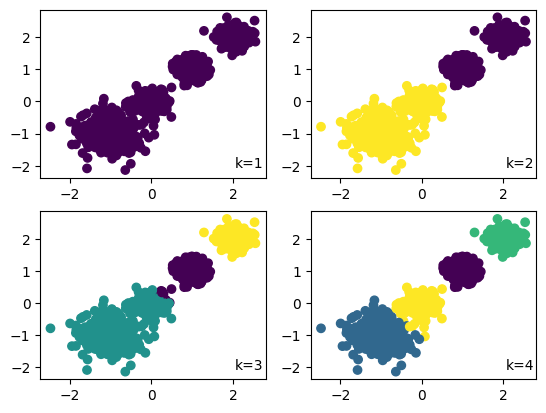

In [ ]:
import numpy as np
# from sklearn.datasets.samples_generator import make_blobs  # 新scikit-learn版本中，samples_generator子模块已被移除，直接放在datasets下
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=1000,n_features=2,centers=[[-1,-1],[0,0],[1,1],[2,2]],cluster_std=[0.4,0.2,0.2,0.2],random_state=6)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
for index,k in enumerate((1,2,3,4)):
    plt.subplot(2,2,index+1)
    y_pred = KMeans(n_clusters=k,random_state=6).fit_predict(X)
    plt.scatter(X[:,0],X[:,1],c=y_pred)
    plt.text(0.99,0.06,'k=%d'%k,transform=plt.gca().transAxes,horizontalalignment='right') 
    # 图表中添加文本的函数  gca（）获取当前活动的坐标轴对象 get current axes
    # transAxes 是一种转换方式，表示坐标是相对于当前坐标轴的比例，而不是数据坐标，确保无论数据如何变化，文本都会出现在图表的相对固定位置
plt.show()


层次聚类应用实例

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_swiss_roll

# 生成样本点
n_samples = 1500
noise = 0.05
X,_= make_swiss_roll(n_samples=n_samples,noise=noise)
X[:,1]*=0.5

# 训练
ward = AgglomerativeClustering(n_clusters=3,linkage='ward').fit(X)
label = ward.labels_
print("样本点数目: %i" % label.size)

样本点数目: 1500


C:\Users\DLadmin\AppData\Local\Temp\ipykernel_51448\2270901193.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


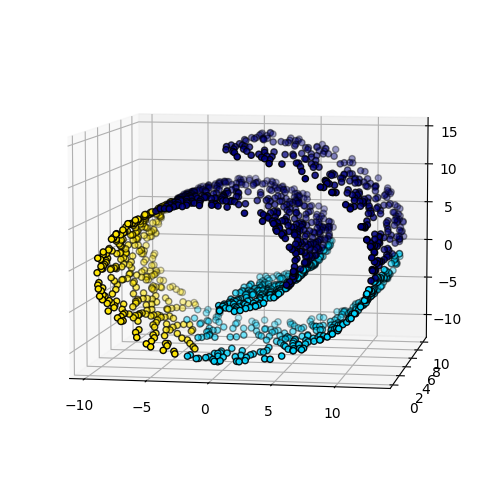

In [17]:
# 可视化结果
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7,-80)
for l in np.unique(label):
    ax.scatter(X[label==l,0],X[label==l,1],X[label==l,2],
               color=plt.cm.jet(np.float32(l)/np.max(label+1)),s=20,edgecolor='k')
plt.show()

C:\Users\DLadmin\AppData\Local\Temp\ipykernel_51448\1735456948.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


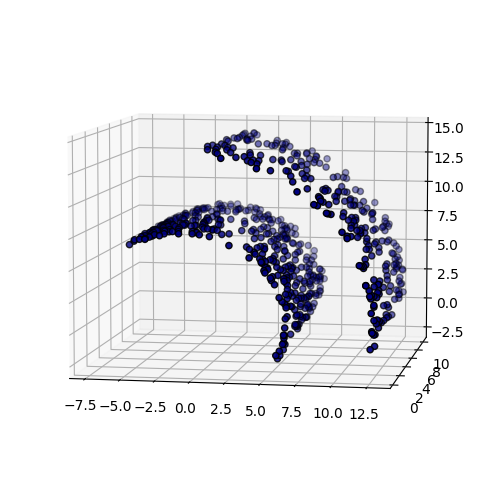

In [20]:
# 可视化结果
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7,-80)
for l in np.unique(label):
    ax.scatter(X[label==l,0],X[label==l,1],X[label==l,2],
               color=plt.cm.jet(np.float32(l)/np.max(label+1)),s=20,edgecolor='k')
    plt.show()

密度聚类——\
基于密度的空间聚类噪声应用DBSCAN

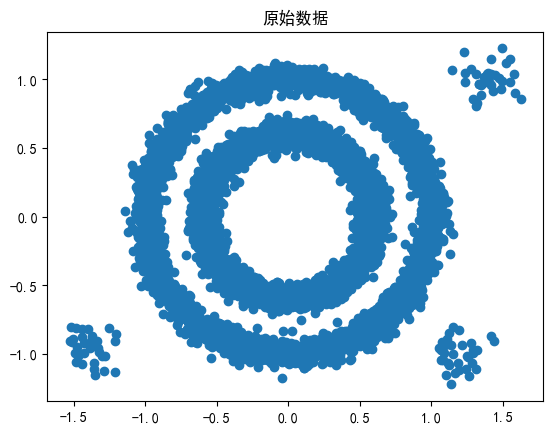

In [23]:
# 生成原始数据
import numpy as np
from sklearn.datasets import make_blobs
from sklearn import datasets
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 生成两个混合数据集
centers = [[1.4,1],[-1.4,-1],[1.2,-1]]
X1,y1 = make_blobs(n_samples=100,centers=centers,cluster_std=0.1,random_state=0)
X2,y2 = datasets.make_circles(n_samples=6000,factor=0.6,noise=0.05)
X = np.concatenate((X1,X2))

plt.title("原始数据")
plt.scatter(X[:,0],X[:,1],marker='o')
plt.show()

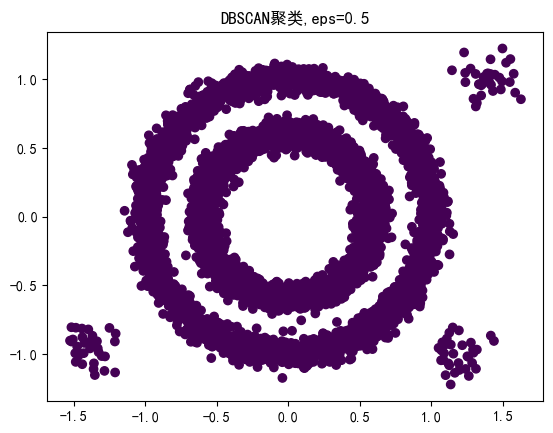

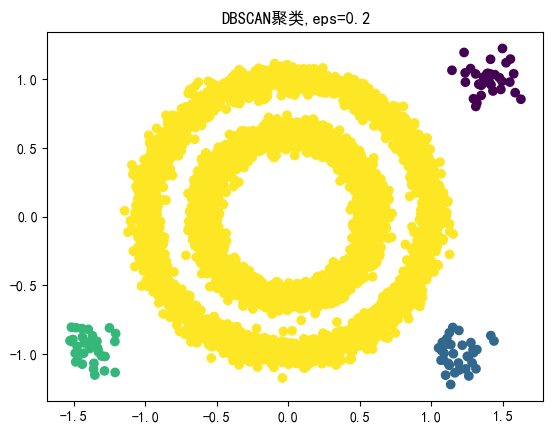

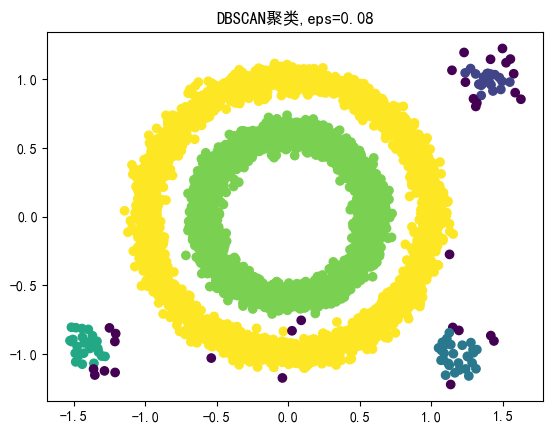

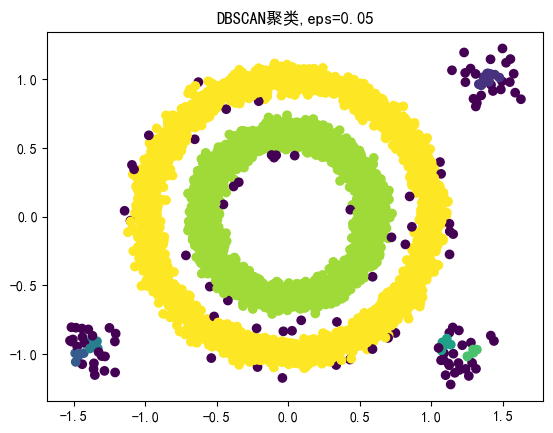

In [36]:
# 对上面的数据运用密度聚类
from sklearn.cluster import DBSCAN
eps_list = [0.5,0.2,0.08,0.05] # eps 分别取不同的值，其它参数值一样
for eps in eps_list:
    y_pred = DBSCAN(eps=eps).fit_predict(X)
    plt.title('DBSCAN聚类,eps=%s' % eps)
    plt.scatter(X[:,0],X[:,1],c=y_pred)
    plt.show()

谱聚类--spectral clustering\
与传统的K-Means算法和层次聚类算法等相比，谱聚类对数据分布的适应性更强，聚类效果比较优秀，同时聚类的计算量也小很多\
主要思想：\
把所有的样本数据看做空间中的点，点之间用边连接起来形成图。图里面边的权重与点之间的距离有关，距离较远的两点之间的边权重值较低，距离较近的两点之间的边权重值较高。对所有数据点组成的图进行切图，让切图后不同子图间边的权重和的值尽可能小，而子图内边的权重和的值尽可能大，从而达到聚类的目的 

In [37]:
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

C:\Users\DLadmin\AppData\Local\Temp\ipykernel_51448\2789507424.py:4: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = face(gray=True)
C:\Users\DLadmin\AppData\Local\Temp\ipykernel_51448\2789507424.py:27: UserWarning: The following kwargs were not used by contour: 'contours'
  plt.contour(labels==l,contours=1,colors=[plt.cm.nipy_spectral(l/float(N_REGIONS))])


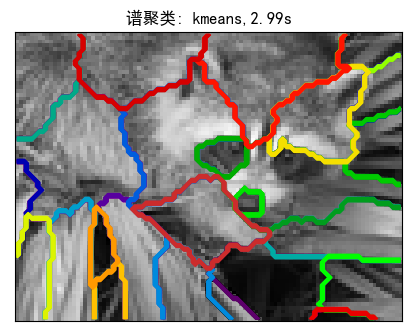

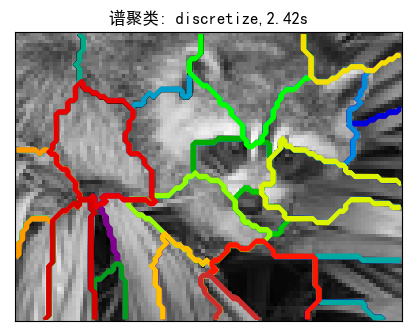

In [66]:
# 加载数据集
from scipy.misc import face
from PIL import Image
face = face(gray=True)
pil_face = Image.fromarray(face)
resized_face = pil_face.resize((int(pil_face.width*0.1),int(pil_face.height*0.1)),Image.Resampling.LANCZOS)
face = np.array(resized_face)/255.0
# 缩小为原来的10% 以加速训练过程

# 将图片转换成图
graph = image.img_to_graph(face)

beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data/graph.data.std())+eps
# 应用谱聚类并可视化
for assign_labels in ('kmeans','discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph,n_clusters=25,assign_labels=assign_labels,random_state=1)
    t1 = time.time()
    labels = labels.reshape(face.shape)

    plt.figure(figsize=(5,5))
    plt.imshow(face,cmap=plt.cm.gray)
    N_REGIONS = 25
    for l in range(N_REGIONS):
        plt.contour(labels==l,contours=1,colors=[plt.cm.nipy_spectral(l/float(N_REGIONS))])
    plt.xticks(())
    plt.yticks(())
    title = "谱聚类: %s,%.2fs" %(assign_labels,(t1-t0))
    plt.title(title)

plt.show()


高斯混合模型 GMM
- 优点\
1、多维情况下，高斯混合模型在计算均值和方差时使用了协方差，应用了不同维度之间的相互约束关系，在各类尺寸不同、聚类间有相关关系时，GMM可能比K_Means聚类更合适\
2、GMM基于概率密度函数进行学习，所以除在聚类应用外，还常应用于密度检测\
3、K-Means是硬分类，要么属于这类，要么属于那类；而GMM是软分类，比如一个样本60%属于A，40%属于B\
- 缺点\
1、类别个数只能靠猜测\
2、结果受初始值的影响\
3、可能限于局部最优解


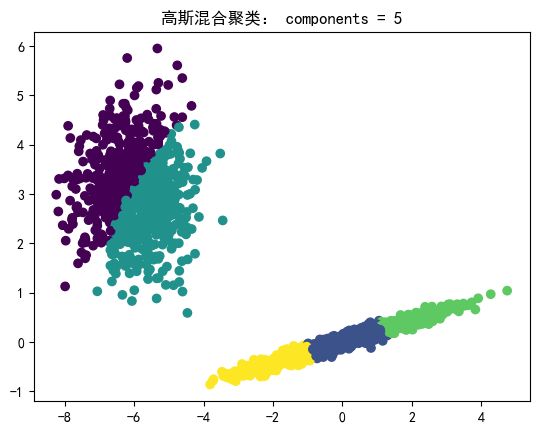

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture

# 生成数据
C = np.array([[0,-0.08],[1.4,0.3]])
X = np.r_[np.dot(np.random.randn(1000,2),C),0.8*np.random.randn(800,2)+np.array([-6,3])]

# 运用高斯混合聚类：选择2个成分
components = 5
gmm = mixture.GaussianMixture(n_components = components,covariance_type = 'full').fit(X)
y_pred = gmm.predict(X)

title = "高斯混合聚类： components = %s" % components
plt.title(title)
plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.show()